In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score,recall_score,auc,roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import label_binarize
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from itertools import cycle
from sklearn.impute import SimpleImputer

In [34]:
main_df=pd.read_csv('Life Expectancy Dataset(cleaned_encoded_normalized).csv')
main_df = pd.DataFrame(main_df)

In [79]:
main_df.columns

Index(['Country', 'Country Code', 'Region', 'IncomeGroup', 'Year',
       'Life Expectancy World Bank', 'Prevelance of Undernourishment', 'CO2',
       'Health Expenditure %', 'Unemployment', 'Injuries', 'Communicable',
       'NonCommunicable', 'Income per capita',
       'Adult Mortality(per 1000 people)', 'Education expenditure(%)',
       'Population', 'GDP', 'Infant deaths(per 1000 live births)'],
      dtype='object')

In [61]:
main_df

,Country,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Unemployment,Injuries,Communicable,NonCommunicable,Income per capita,Adult Mortality(per 1000 people),Education expenditure(%),Population,GDP,Infant deaths(per 1000 live births)
0,Angola,AGO,6,2,2001,0.001860,0.058562,0.084448,0.233449,0.199380,5.805561e-01,7.024626e-08,0.222639,0.014050,0.140921,0.608541,0.277253,0.020754,0.025887
1,Albania,ALB,1,3,2001,0.875155,0.082192,0.017039,0.465157,0.952479,4.882236e-02,2.061713e-02,0.044495,0.034556,0.343496,0.500593,0.051205,0.007443,0.203463
2,United Arab Emirates,ARE,3,0,2001,0.878254,0.010274,0.514636,0.059233,0.121384,6.033136e-02,9.550002e-03,0.040267,0.850071,0.084688,0.608541,0.054036,0.196385,0.074459
3,Argentina,ARG,2,3,2001,0.868584,0.017123,0.663221,0.572300,0.887397,5.828896e-01,2.205518e-01,0.674637,0.195671,0.457317,0.663108,0.609875,0.571117,0.144589
4,Armenia,ARM,1,3,2001,0.844285,0.808219,0.018999,0.248258,0.556302,4.310468e-02,1.788680e-02,0.064188,0.018592,0.510840,0.383155,0.049913,0.004002,0.232900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2413,Uruguay,URY,2,0,2019,0.920035,0.000000,0.034302,0.657666,0.451446,5.426015e-02,1.083274e-02,0.071639,0.480557,0.627371,0.647687,0.056638,0.116397,0.038961
2414,Uzbekistan,UZB,1,2,2019,0.843293,0.000000,0.617946,0.332753,0.294938,4.535294e-01,2.801030e-01,0.590114,0.048212,0.257453,0.920522,0.539621,0.114583,0.113420
2415,Vanuatu,VUT,0,2,2019,0.827796,0.339041,0.001048,0.135889,0.085744,5.200352e-03,3.807466e-03,0.005784,0.084430,0.329268,0.301305,0.004906,0.001743,0.193939
2416,Samoa,WSM,0,2,2019,0.863129,0.065068,0.001524,0.397213,0.427169,2.768412e-03,1.328743e-03,0.003660,0.117230,0.318428,0.648873,0.003224,0.001711,0.131602


# Model 1-Random Forest Regression

In [149]:
data = main_df.copy()
data = data.dropna()
random_forest_data = data.copy()

In [151]:
# Extract columns for Random forest using Income per capita for predicting life expectancy
x = random_forest_data['Income per capita'].values.reshape(-1,1)
y = random_forest_data['Life Expectancy World Bank'].values.reshape(-1,1)

In [152]:
random_forest = RandomForestRegressor(n_estimators=100, random_state=25)
random_forest.fit(x,y)

/var/folders/gp/ncd7m3w97j7d164ywzzhnxpm0000gn/T/ipykernel_5519/1973844867.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(x,y)


RandomForestRegressor(random_state=25)

In [153]:
print(random_forest.predict([[1000]]))

[0.94366105]


## Plot for Incomeper capita vs predicted Life expectancy

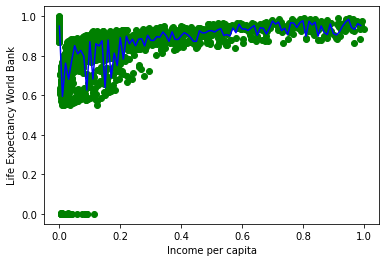

In [154]:
# Plot results
x_axis = np.arange(min(x),max(x),0.01).reshape(-1,1)
y_axis = random_forest.predict(x_axis)
plt.scatter(x,y, color="green")
plt.plot(x_axis,y_axis,color="blue")
plt.xlabel("Income per capita")
plt.ylabel("Life Expectancy World Bank")
plt.show()

In [155]:
# Drop non integer value columns
data.drop(columns=['Country'], inplace=True)
data.drop(columns=['Country Code'], inplace=True)

In [156]:
# Shuffle data and generate train data an=d test data
df_shuffled = data.sample(frac=1, random_state=42)
train_size = 0.8
test_size = 0.2
train_data, test_data = train_test_split(df_shuffled, test_size=test_size, random_state=42)

In [157]:
target_column = 'Life Expectancy World Bank'

X_train = train_data.drop(target_column, axis=1)
y_train = train_data[target_column]

X_test = test_data.drop(target_column, axis=1)
y_test = test_data[target_column]

In [158]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [159]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [160]:
# Create a Random Forest model and fit it to the training data
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [161]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

In [162]:
# Evaluate the model using metrics like Mean Squared Error (MSE) and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.001641357524044338
R-squared: 0.9364489614560323


## Scatter plot between Actual vs Predicted values

In [163]:
def plot_actual_vs_predicted(actual_values, predicted_values):
    # Scatter plot of actual vs. predicted values
    plt.figure(figsize=(10, 5))
    plt.scatter(actual_values, predicted_values, s=20, color='green')
    plt.title('Predicted Life Expectancy vs. Actual Life Expectancy')
    plt.xlabel('Actual Life Expectancy')
    plt.ylabel('Predicted Life Expectancy')
    plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], linestyle='--', color='blue')
    plt.tight_layout()

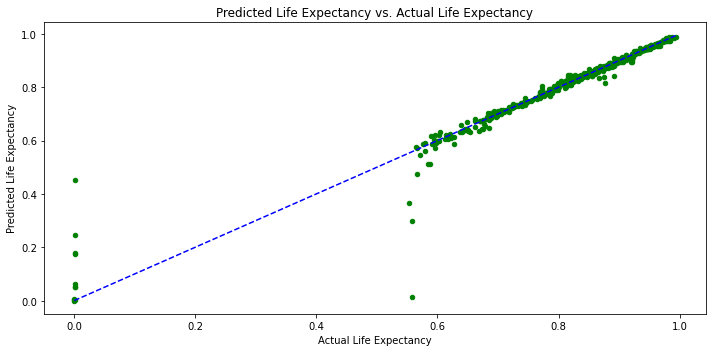

In [164]:
plot_actual_vs_predicted(y_test, y_pred)

random forest fine tuning

In [165]:
# Create a Random Forest model
rf_model = RandomForestRegressor(random_state=42)

In [166]:
# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [167]:
# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [168]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [169]:
# Use the best model to make predictions on the test set
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test_scaled)

In [170]:
# Evaluate the model using metrics like Mean Squared Error (MSE) and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error after fine tuning: {mse}')
print(f'R-squared after fine tuning: {r2}')

Mean Squared Error after fine tuning: 0.0016282320226046851
R-squared after fine tuning: 0.9369571622810695


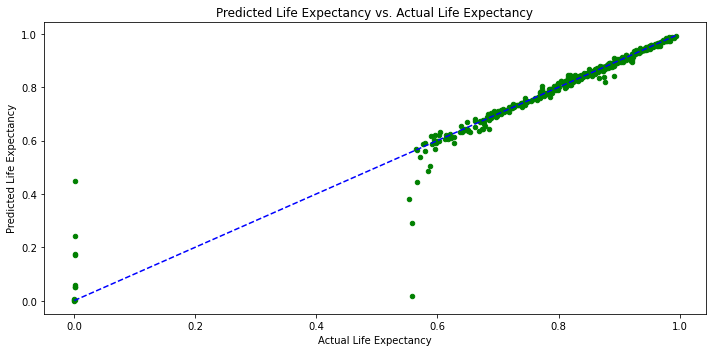

In [171]:
plot_actual_vs_predicted(y_test, y_pred)

# Feature Importance Bar Graph

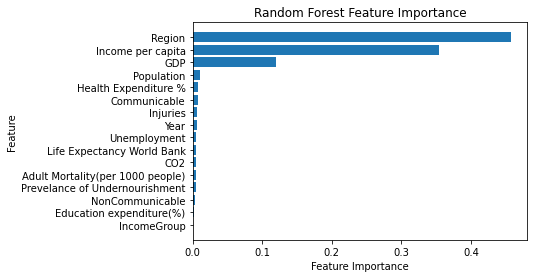

In [172]:
# Plot feature importance
feature_importance = best_rf_model.feature_importances_
data_rf = df_shuffled.copy()
data_rf.drop(target_column, axis=1)
feature_names = data_rf.columns[:-1]
sorted_idx = np.argsort(feature_importance)

plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()

# Model 2-Logistic Regression

In [173]:
data3 = main_df.copy()
data3.drop(["Country"], axis=1, inplace=True)
data3.drop(["Country Code"], axis=1, inplace=True)
data3.head()

,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Unemployment,Injuries,Communicable,NonCommunicable,Income per capita,Adult Mortality(per 1000 people),Education expenditure(%),Population,GDP,Infant deaths(per 1000 live births)
0,6,2,2001,0.001860,0.058562,0.084448,0.233449,0.199380,0.580556,7.024626e-08,0.222639,0.014050,0.140921,0.608541,0.277253,0.020754,0.025887
1,1,3,2001,0.875155,0.082192,0.017039,0.465157,0.952479,0.048822,2.061713e-02,0.044495,0.034556,0.343496,0.500593,0.051205,0.007443,0.203463
2,3,0,2001,0.878254,0.010274,0.514636,0.059233,0.121384,0.060331,9.550002e-03,0.040267,0.850071,0.084688,0.608541,0.054036,0.196385,0.074459
3,2,3,2001,0.868584,0.017123,0.663221,0.572300,0.887397,0.582890,2.205518e-01,0.674637,0.195671,0.457317,0.663108,0.609875,0.571117,0.144589
4,1,3,2001,0.844285,0.808219,0.018999,0.248258,0.556302,0.043105,1.788680e-02,0.064188,0.018592,0.510840,0.383155,0.049913,0.004002,0.232900


In [174]:
X = data3.drop("Life Expectancy World Bank", axis=1)
y = data3["Life Expectancy World Bank"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [175]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [176]:
median_life_expectancy = data3["Life Expectancy World Bank"].median()
y_train_binary = (y_train > median_life_expectancy).astype(int)
y_test_binary = (y_test > median_life_expectancy).astype(int)

model = LogisticRegression()

model.fit(X_train, y_train_binary)

y_pred_binary = model.predict(X_test)

In [177]:
accuracy_binary = accuracy_score(y_test_binary, y_pred_binary)
print(f"Accuracy: {accuracy_binary}")
print("Classification Report:")
print(classification_report(y_test_binary, y_pred_binary))

Accuracy: 0.8822314049586777
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       253
           1       0.85      0.91      0.88       231

    accuracy                           0.88       484
   macro avg       0.88      0.88      0.88       484
weighted avg       0.88      0.88      0.88       484



In [178]:
# Define hyperparameters to tune
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
}

In [179]:
# Create logistic regression model
logreg = LogisticRegression()


In [180]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train_binary)

/Users/kapilgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/kapilgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kapilgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/kapilgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [181]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 1, 'penalty': 'l2'}


In [182]:
# Train the model with the best parameters
best_logreg = LogisticRegression(**best_params)
best_logreg.fit(X_train, y_train_binary)

LogisticRegression(C=1)

In [183]:
# Make predictions on the test set
y_pred_tuned = best_logreg.predict(X_test)

In [184]:
# Evaluate the tuned model
accuracy_tuned = accuracy_score(y_test_binary, y_pred_tuned)
print(f"Tuned Model Accuracy: {accuracy_tuned}")
print("Classification Report:")
print(classification_report(y_test_binary, y_pred_tuned))

Tuned Model Accuracy: 0.8822314049586777
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       253
           1       0.85      0.91      0.88       231

    accuracy                           0.88       484
   macro avg       0.88      0.88      0.88       484
weighted avg       0.88      0.88      0.88       484



## Confusion Matrix Visualization

In [185]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test_binary, y_pred_tuned)

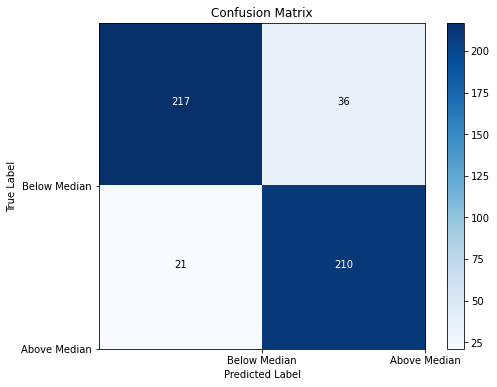

In [186]:
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = ['Below Median', 'Above Median']
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment="center", color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.show()

## ROC Curve

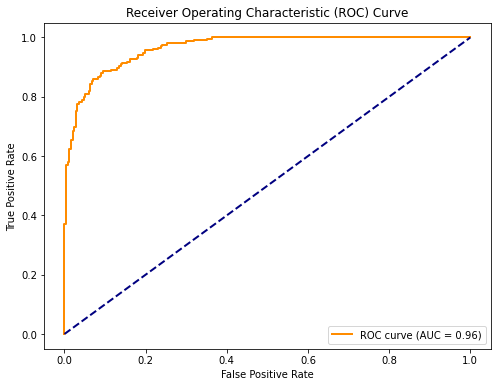

In [187]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test_binary, best_logreg.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Model 3-K-Nearest Neighbors

In [38]:
#picking target column
df_y = main_df['IncomeGroup']
df_x = main_df.drop(['IncomeGroup','Country','Country Code','Year','Region'],axis=1)

In [39]:
#Splitting the data
dfx_train,dfx_test,dfy_train,dfy_test = train_test_split(df_x,df_y,test_size=0.2)

In [44]:
#Creating the model
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(dfx_train,dfy_train)
knn_pred=knn.predict(dfx_test)

In [45]:
print('Accuracy:',accuracy_score(dfy_test,knn_pred))

print('Classification Report:\n',classification_report(dfy_test,knn_pred))

Accuracy: 0.9772727272727273
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       163
           1       0.97      0.98      0.97        58
           2       0.98      0.98      0.98       123
           3       0.96      0.98      0.97       140

    accuracy                           0.98       484
   macro avg       0.98      0.98      0.98       484
weighted avg       0.98      0.98      0.98       484



## Confusion Matrix Visualization

In [117]:
confusion_matrix(dfy_test,knn_pred)

array([[159,   0,   0,   4],
       [  0,  57,   1,   0],
       [  0,   2, 120,   1],
       [  1,   0,   2, 137]])

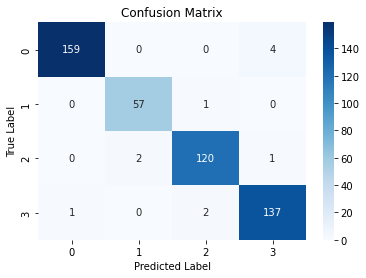

In [60]:
labels=[0,1,2,3]
conf_matrix=confusion_matrix(dfy_test,knn_pred)
conf=sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
conf.set_xticklabels(labels)
conf.set_yticklabels(labels)
conf.set_xlabel('Predicted Label')
conf.set_ylabel('True Label')
conf.set_title('Confusion Matrix')
plt.show()

## Learning curve

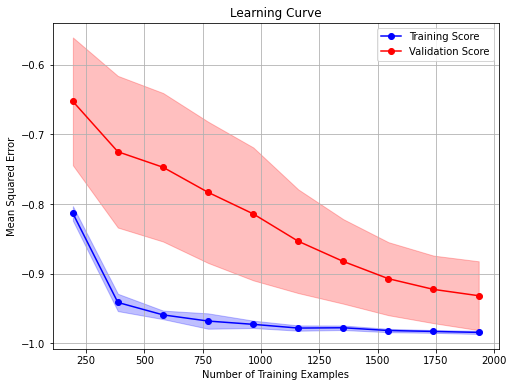

In [111]:
train_sizes, train_scores, test_scores = learning_curve(knn, df_x, df_y, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation of training and test scores
train_mean = -np.mean(train_scores, axis=1)
train_std = -np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = -np.std(test_scores, axis=1)

# Create the learning curve plot
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, marker='o', label='Training Score', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.25)
plt.plot(train_sizes, test_mean, marker='o', label='Validation Score', color='red')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.25)
plt.xlabel('Number of Training Examples')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()


## Scatter Plot comparison

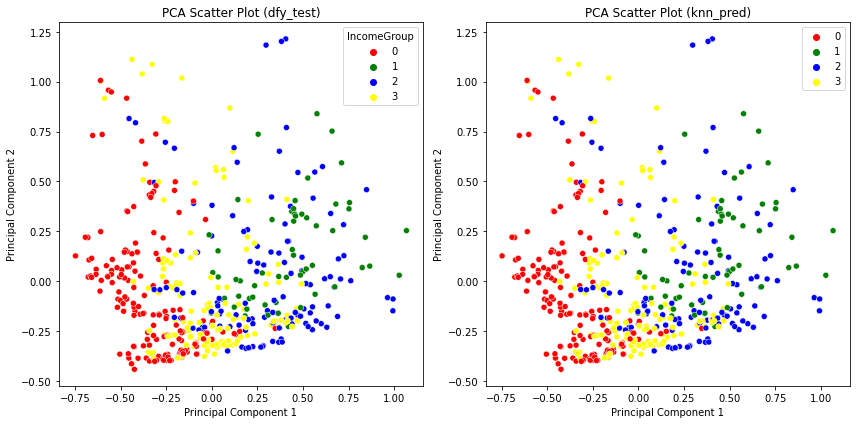

In [87]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

pca = PCA(n_components=2)
data_pca = pca.fit_transform(dfx_test)

colors_dfy_test = ['red', 'green', 'blue', 'yellow']

# Scatter plot of the first two principal components for dfy_test
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=dfy_test, ax=axes[0],palette=colors_dfy_test)
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')
axes[0].set_title('PCA Scatter Plot (dfy_test)')

# Scatter plot of the first two principal components for knn_pred
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=knn_pred, ax=axes[1],palette=colors_dfy_test)
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Principal Component 2')
axes[1].set_title('PCA Scatter Plot (knn_pred)')


mat.tight_layout()
mat.show()


# Model 4-Support Vector Regression

In [52]:
dfy2=main_df['Life Expectancy World Bank']
dfx2=main_df.drop(['Life Expectancy World Bank','Country','Year','Country Code'],axis=1)

In [54]:
dfx2_train,dfx2_test,dfy2_train,dfy2_test = train_test_split(dfx2,dfy2,test_size=0.2)

In [144]:
svr = SVR(kernel='rbf', C=1.0, epsilon=0.05)
svr.fit(dfx2_train,dfy2_train)
svr_pred=svr.predict(dfx2_test)

In [145]:
print("Mean Squared Error:",mean_squared_error(dfy2_test, svr_pred))
print("R-squared (R^2):",r2_score(dfy2_test, svr_pred))

Mean Squared Error: 0.01
R-squared (R^2): 0.68


## Scatter Plot between Actual vs Predicted values

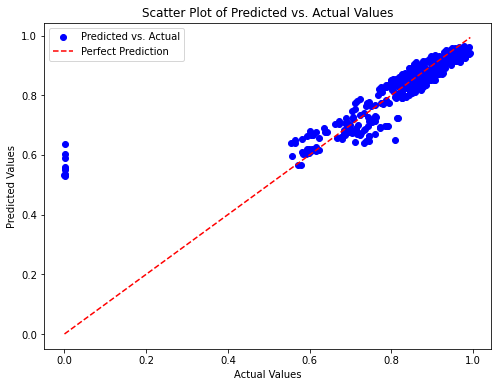

In [146]:
plt.figure(figsize=(8, 6))
plt.scatter(dfy2_test, svr_pred, c='blue', label='Predicted vs. Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs. Actual Values')
plt.plot([min(dfy2_test), max(dfy2_test)], [min(dfy2_test), max(dfy2_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.legend()
plt.show()

## Error Distribution Plot

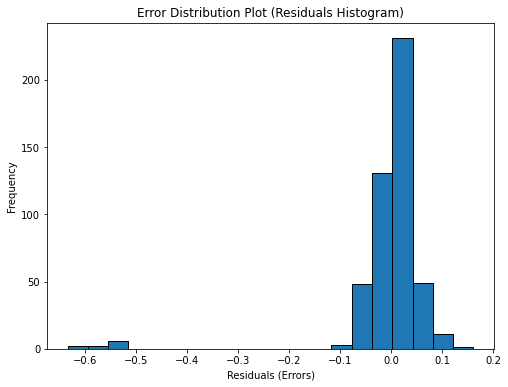

In [147]:
residuals = np.array(dfy2_test) - np.array(svr_pred)
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, edgecolor='k')
plt.xlabel('Residuals (Errors)')
plt.ylabel('Frequency')
plt.title('Error Distribution Plot (Residuals Histogram)')
plt.show()

## Learning Curve

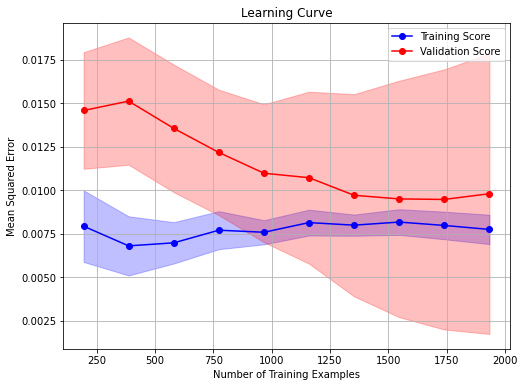

In [148]:
# Compute the learning curve
train_sizes, train_scores, test_scores = learning_curve(svr, dfx2, dfy2, train_sizes=np.linspace(0.1, 1.0, 10), scoring='neg_mean_squared_error')

# Calculate the mean and standard deviation of training and test scores
train_mean = -np.mean(train_scores, axis=1)
train_std = -np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = -np.std(test_scores, axis=1)

# Create the learning curve plot
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, marker='o', label='Training Score', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.25)
plt.plot(train_sizes, test_mean, marker='o', label='Validation Score', color='red')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.25)
plt.xlabel('Number of Training Examples')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()


In [189]:
df=main_df.copy()

In [192]:
#shuffling the dataset
df = shuffle(df, random_state=42)

# Model 5-Polynomial Regression

In [193]:
#Polynomial Regression
X_poly = df[['CO2','Health Expenditure %', 'Unemployment', 'Income per capita', 'Education expenditure(%)','GDP', 'Infant deaths(per 1000 live births)']]
y_poly = df['Life Expectancy World Bank']
X_train, X_test, y_train, y_test = train_test_split(X_poly, y_poly, test_size=0.2, random_state=42)

degree = 2
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared (R2) Score: {r2:.2f}')

Mean Squared Error: 0.01
R-squared (R2) Score: 0.43


## Residual plot

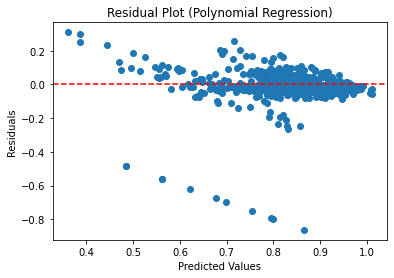

In [194]:
#PLOT 1 FOR POLYNOMIAL REGRESSION -- RESIDUAL PLOT
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Polynomial Regression)')
plt.show()

## Scatter plot between Actual vs Predicted Values

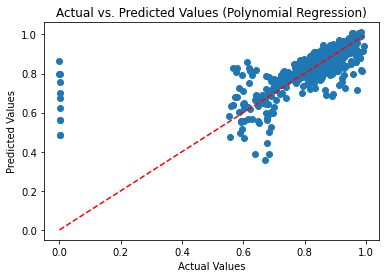

In [195]:
#PLOT 2 FOR POLYNOMIAL REGRESSION -- ACTUAL VS PRED
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Predictions (Diagonal)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Polynomial Regression)')
plt.show()

# Model 6-Gradient Boosting Regression

In [196]:
#Gradient Boosting Regression
X_gbr = df[['CO2','Health Expenditure %', 'Unemployment', 'Income per capita', 'Education expenditure(%)','GDP', 'Infant deaths(per 1000 live births)']]
y_gbr = df['Life Expectancy World Bank']
X_train, X_test, y_train, y_test = train_test_split(X_gbr, y_gbr, test_size=0.2, random_state=42)

gbr_model = GradientBoostingRegressor(n_estimators=100,learning_rate=0.01, max_depth=5,min_samples_split=3,min_samples_leaf=3,random_state=41)

gbr_model.fit(X_train, y_train)
#k-fold cross-validation
cv_scores_r2 = cross_val_score(gbr_model, X_gbr, y_gbr, cv=5, scoring='r2')
print(f'Average Cross-Validated R-squared (R2) Score: {np.mean(cv_scores_r2):.2f}')
for i, r2 in enumerate(cv_scores_r2, start=1):
    print(f'Fold {i} - R2: {r2:.2f}')

y_pred_gbr = gbr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_gbr)
r2 = r2_score(y_test, y_pred_gbr)
print(f'Mean Squared Error on Test Set: {mse:.2f}')
print(f'R-squared (R2) Score on Test Set: {r2:.2f}')

Average Cross-Validated R-squared (R2) Score: 0.68
Fold 1 - R2: 0.67
Fold 2 - R2: 0.74
Fold 3 - R2: 0.66
Fold 4 - R2: 0.64
Fold 5 - R2: 0.70
Mean Squared Error on Test Set: 0.01
R-squared (R2) Score on Test Set: 0.65


## Scatter plot between Actual vs Predicted Values

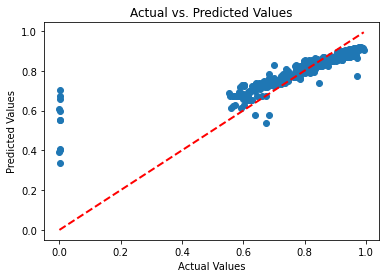

In [197]:
# PLOT 1 FOR GBR -- ACTUAL VS PRED
plt.scatter(y_test, y_pred_gbr)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

## Learning curve

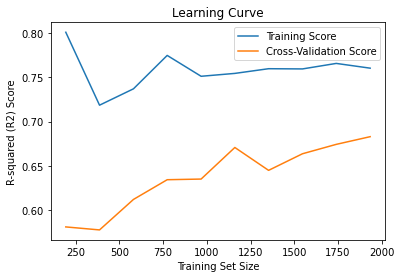

In [198]:
#PLOT 2 -- LEARNING CURVE GRAPH
# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(gbr_model, X_gbr, y_gbr, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10))

# Plot learning curve
plt.figure(figsize=(6, 4))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('R-squared (R2) Score')
plt.title('Learning Curve')
plt.legend()
plt.show()